2a) Cropping and Resize Images in Your 4-class Images Dataset: 

In [5]:
import os
from PIL import Image
import glob
import xml.etree.ElementTree as ET
from pathlib import Path

dog_images = glob.glob('/Users/galianudeepreddy/Desktop/Python Files/Images/*/*')
annotations = glob.glob('/Users/galianudeepreddy/Desktop/Python Files/Annotations/*/*')
cropped_dir = './Cropped/'
img_size = 128
input_shape = (299, 299, 3)

Path(cropped_dir).mkdir(parents=True, exist_ok=True)

def get_bounding_boxes(annot):
    tree = ET.parse(annot)
    root = tree.getroot()
    objects = root.findall('object')
    
    bbox = []
    for obj in objects:
        bndbox = obj.find('bndbox')
        xmin = int(bndbox.find('xmin').text)
        ymin = int(bndbox.find('ymin').text)
        xmax = int(bndbox.find('xmax').text)
        ymax = int(bndbox.find('ymax').text)
        bbox.append((xmin, ymin, xmax, ymax))
    return bbox

def get_image_path(annot):
    img_path = '/Users/galianudeepreddy/Desktop/Python Files/Images/'
    file_parts = annot.split('/')
    img_filename = img_path + file_parts[-2] + '/' + file_parts[-1] + '.jpg'
    return img_filename

def process_and_crop_image(image_path, bbox_list, save_dir):
    try:
        with Image.open(image_path) as im:
            for j, bbox in enumerate(bbox_list):
                # Crop and resize the image based on the bounding box
                cropped_im = im.crop(bbox).resize((img_size, img_size), Image.LANCZOS)
                cropped_im = cropped_im.convert('RGB')
                
                # Generate new path for saving the cropped image
                new_path = image_path.replace('/Users/galianudeepreddy/Desktop/Python Files/Images/', save_dir)
                new_path = new_path.replace('.jpg', f'-{j}.jpg')
                
                # Ensure directory exists and save the cropped image
                head, _ = os.path.split(new_path)
                Path(head).mkdir(parents=True, exist_ok=True)
                cropped_im.save(new_path)
    except FileNotFoundError:
        print(f"Image {image_path} not found. Skipping.")
    except Exception as e:
        print(f"Error processing image {image_path}: {e}")

print(f"Processing {len(dog_images)} images and {len(annotations)} annotations...")

for annot in annotations:
    bbox = get_bounding_boxes(annot)
    img_path = get_image_path(annot)
    if bbox:
        process_and_crop_image(img_path, bbox, cropped_dir)

print("Processing completed.")


Processing 613 images and 613 annotations...
Processing completed.


2b) Feature Extraction: Edge histogram AND Similarity Measurements

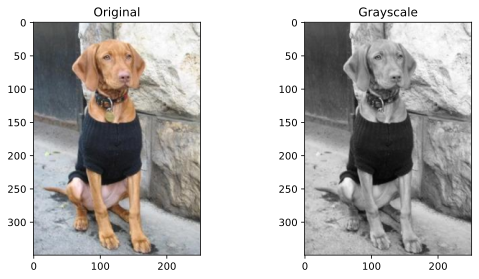

Angle Sobel for /Users/galianudeepreddy/Desktop/Python Files/Images/n02100583-vizsla/n02100583_12.jpg: 
 [[3.10934577 3.00904112 2.9562447  ... 1.07041734 0.40489179 0.27829966]
 [3.07028519 3.03851105 3.07917384 ... 0.91137322 0.42585808 0.32898651]
 [0.06656816 3.14159265 3.03093543 ... 0.2964518  2.64561611 2.7712626 ]
 ...
 [2.40377759 2.23908575 2.56913284 ... 1.0029848  1.52978528 1.50938922]
 [3.00231339 2.94093978 3.07599348 ... 3.13885368 1.17038308 1.14564584]
 [2.99122123 2.97644398 0.08620557 ... 2.89831267 1.23154664 1.22513189]]
Histogram Data for /Users/galianudeepreddy/Desktop/Python Files/Images/n02100583-vizsla/n02100583_12.jpg:
 (array([2656, 2315, 2240, 2109, 1925, 2022, 1869, 1825, 1984, 2062, 1995,
       2041, 2133, 2273, 2336, 2429, 2560, 2876, 3054, 2976, 2826, 2810,
       2619, 2577, 2598, 2608, 2485, 2742, 2518, 2696, 2613, 2674, 2674,
       2628, 2660, 2442]), array([0.04363323, 0.13089969, 0.21816616, 0.30543262, 0.39269908,
       0.47996554, 0.56723201,

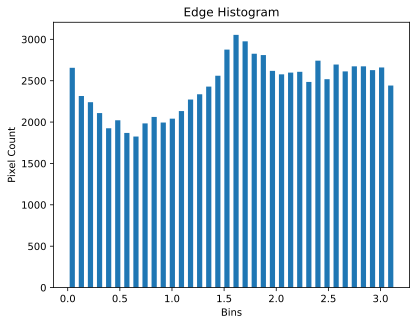

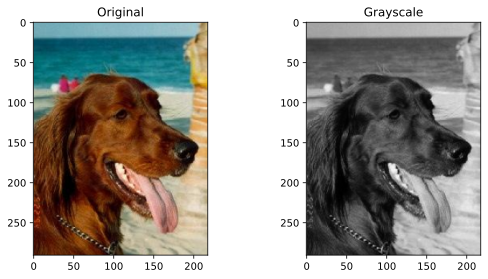

Angle Sobel for /Users/galianudeepreddy/Desktop/Python Files/Images/n02100877-Irish_setter/n02100877_71.jpg: 
 [[0.00000000e+00 1.97395560e-01 4.63647609e-01 ... 1.53081764e+00
  1.83012807e+00 0.00000000e+00]
 [0.00000000e+00 1.33226763e-15 7.67718913e-02 ... 1.38373296e+00
  1.53224683e+00 0.00000000e+00]
 [3.07502449e+00 7.67718913e-02 9.06598872e-02 ... 1.23374780e+00
  7.85398163e-01 0.00000000e+00]
 ...
 [1.77491356e+00 4.16108637e-01 2.09953322e+00 ... 2.06404569e+00
  1.68018020e+00 0.00000000e+00]
 [1.19282738e+00 2.15698743e-01 2.17983895e+00 ... 1.57079633e+00
  1.57079633e+00 0.00000000e+00]
 [1.34779968e+00 1.27342430e-02 1.83453061e+00 ... 1.57079633e+00
  1.57079633e+00 0.00000000e+00]]
Histogram Data for /Users/galianudeepreddy/Desktop/Python Files/Images/n02100877-Irish_setter/n02100877_71.jpg:
 (array([3002, 2144, 1855, 1679, 1572, 1485, 1392, 1369, 1349, 1407, 1349,
       1354, 1515, 1568, 1639, 1657, 1732, 1770, 1892, 1825, 1816, 1761,
       1672, 1758, 1708, 1613

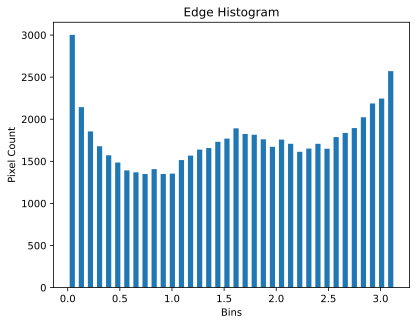

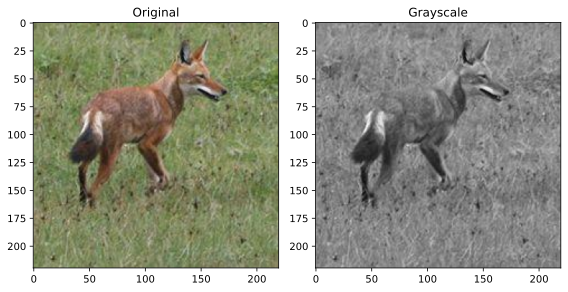

Angle Sobel for /Users/galianudeepreddy/Desktop/Python Files/Images/n02115913-dhole/n02115913_25.jpg: 
 [[0.78539816 1.49402444 1.60019961 ... 0.43662716 0.26625205 0.02856366]
 [3.07502449 1.78485701 1.735945   ... 2.02298692 1.56964737 0.50937192]
 [1.42889927 3.10161397 1.83704838 ... 2.45685806 2.36649082 2.67432797]
 ...
 [2.43296638 0.48689923 1.46013911 ... 1.39341418 0.82292542 0.33574477]
 [0.27384204 3.02815766 2.42750195 ... 1.75319057 1.20245168 0.58900167]
 [0.30195116 2.741352   2.05641842 ... 1.6857876  1.48013644 1.12469078]]
Histogram Data for /Users/galianudeepreddy/Desktop/Python Files/Images/n02115913-dhole/n02115913_25.jpg:
 (array([1062, 1056, 1127, 1137, 1044, 1190, 1271, 1276, 1334, 1344, 1451,
       1579, 1603, 1672, 1736, 1728, 1776, 1804, 1738, 1638, 1586, 1584,
       1498, 1383, 1343, 1280, 1239, 1147, 1157, 1136, 1105, 1075, 1109,
       1040, 1140, 1012]), array([0.04363323, 0.13089969, 0.21816616, 0.30543262, 0.39269908,
       0.47996554, 0.56723201, 0

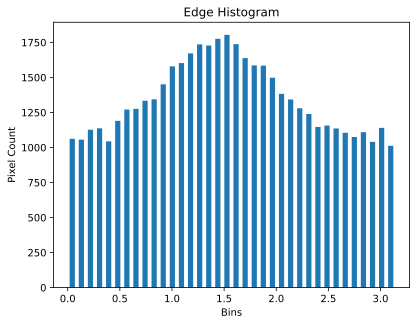

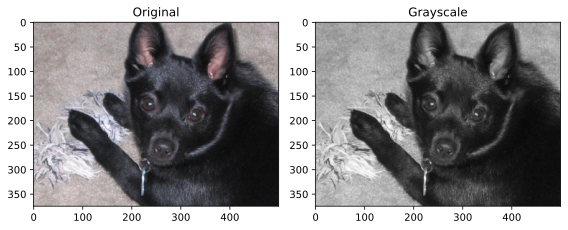

Angle Sobel for /Users/galianudeepreddy/Desktop/Python Files/Images/n02104365-schipperke/n02104365_67.jpg: 
 [[0.60672725 3.03436749 2.02712696 ... 1.46814632 2.29743867 2.91951075]
 [0.2108692  0.0663835  2.6452508  ... 3.07594969 0.020531   0.03240356]
 [0.30403051 0.23498713 2.61372292 ... 0.18304995 0.14310722 0.07766448]
 ...
 [0.48803302 0.53581124 2.75471694 ... 0.         0.         0.        ]
 [0.37865109 0.1308274  2.11121583 ... 0.         0.         0.        ]
 [0.7066142  2.99270271 1.86707468 ... 0.         0.         0.        ]]
Histogram Data for /Users/galianudeepreddy/Desktop/Python Files/Images/n02104365-schipperke/n02104365_67.jpg:
 (array([6035, 5011, 5048, 5151, 4765, 5042, 4746, 4770, 4855, 5265, 4883,
       5006, 5112, 5080, 5446, 5342, 5366, 5513, 5880, 5402, 5502, 5609,
       5276, 5412, 5185, 5025, 4941, 5698, 5016, 5222, 5263, 5032, 5373,
       5235, 5212, 4781]), array([0.04363323, 0.13089969, 0.21816616, 0.30543262, 0.39269908,
       0.47996554, 0.5

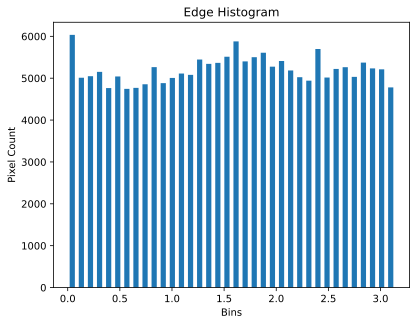

The distances between the edge histograms of the first and third datasets are:
Euclidean Distance: 6947.291846467946
Manhattan Distance: 39450.0
Cosine Distance: 0.021213751639709733


In [13]:
import matplotlib.pyplot as plt
from skimage import io
from skimage.color import rgb2gray
import numpy as np
from skimage import filters, exposure
from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances, cosine_distances

# File paths for the images
image_files = [
    '/Users/galianudeepreddy/Desktop/Python Files/Images/n02100583-vizsla/n02100583_12.jpg', 
    '/Users/galianudeepreddy/Desktop/Python Files/Images/n02100877-Irish_setter/n02100877_71.jpg',
    '/Users/galianudeepreddy/Desktop/Python Files/Images/n02115913-dhole/n02115913_25.jpg',
    '/Users/galianudeepreddy/Desktop/Python Files/Images/n02104365-schipperke/n02104365_67.jpg'
]

edge_histograms = []

def display_images(original, grayscale):
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    ax = axes.ravel()
    ax[0].imshow(original)
    ax[0].set_title("Original")
    ax[1].imshow(grayscale, cmap=plt.cm.gray)
    ax[1].set_title("Grayscale")
    fig.tight_layout()
    plt.show()

def calculate_sobel_angle(grayscale_image):
    sobel_h = filters.sobel_h(grayscale_image)
    sobel_v = filters.sobel_v(grayscale_image)
    return np.mod(np.arctan2(sobel_v, sobel_h), np.pi)

def generate_histogram(angle_image, nbins=36):
    hist_data = exposure.histogram(angle_image, nbins=nbins)
    hist_counts, bin_edges = hist_data
    return hist_counts, bin_edges

def plot_histogram(hist_counts, bin_edges):
    plt.figure()
    plt.bar(bin_edges, hist_counts, width=0.05)
    plt.xlabel("Bins")
    plt.ylabel("Pixel Count")
    plt.title("Edge Histogram")
    plt.show()

for file in image_files:
    original = io.imread(file) 
    grayscale = rgb2gray(original) 
    
    display_images(original, grayscale)
    
    angle_sobel = calculate_sobel_angle(grayscale)
    
    print(f"Angle Sobel for {file}: \n", angle_sobel)
    
    hist_counts, bin_edges = generate_histogram(angle_sobel)
    print(f"Histogram Data for {file}:\n", (hist_counts, bin_edges))
    
    edge_histograms.append(hist_counts)
    
    plot_histogram(hist_counts, bin_edges)

# Compute distances between the edge histograms of the 1st and 3rd images
eud_dist = euclidean_distances([edge_histograms[0]], [edge_histograms[2]])[0][0]
man_dist = manhattan_distances([edge_histograms[0]], [edge_histograms[2]])[0][0]
cos_dist = cosine_distances([edge_histograms[0]], [edge_histograms[2]])[0][0]

# Display the computed distances
print("The distances between the edge histograms of the first and third datasets are:")
print(f"Euclidean Distance: {eud_dist}")
print(f"Manhattan Distance: {man_dist}")
print(f"Cosine Distance: {cos_dist}")

2c) Histogram of Oriented Gradient (HOG) feature descriptor 

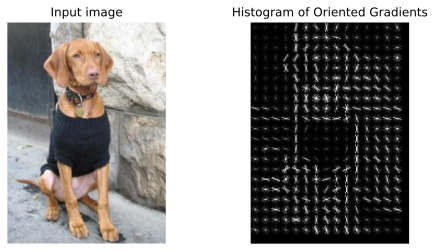

In [14]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import data, exposure
image=io.imread('/Users/galianudeepreddy/Desktop/Python Files/Images/n02100583-vizsla/n02100583_12.jpg')
fd,hog_image=hog(image,orientations=8,pixels_per_cell=(16,16),cells_per_block=(1,1),visualize=True,channel_axis=-1,)
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(8, 4), sharex=True, sharey=True)
ax1.axis('off')
ax1.imshow(image,cmap=plt.cm.gray)
ax1.set_title('Input image')
hog_image_rescaled=exposure.rescale_intensity(hog_image, in_range=(0, 10))
ax2.axis('off')
ax2.imshow(hog_image_rescaled,cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

2d) Dimensionality reduction (using Principal Component Analysis, PCA)

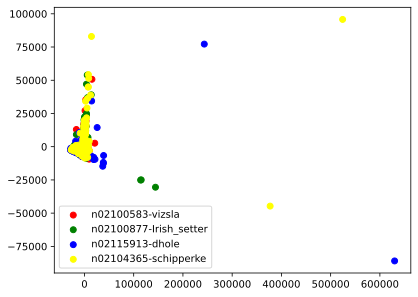

In [21]:
import os
import numpy as np
from PIL import Image
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import json
import warnings
warnings.filterwarnings("ignore")

images_folder='/Users/galianudeepreddy/Desktop/Python Files/Images/'
classes=['n02100583-vizsla','n02100877-Irish_setter','n02115913-dhole','n02104365-schipperke'] 
images=[]
image_classes=[]

def calculate_sobel_angle(grayscale_image):
    sobel_h = filters.sobel_h(grayscale_image)
    sobel_v = filters.sobel_v(grayscale_image)
    return np.mod(np.arctan2(sobel_v, sobel_h), np.pi)

for class_name in classes:
    class_folder=os.path.join(images_folder,class_name)
    for filename in os.listdir(class_folder):
        img=Image.open(os.path.join(class_folder, filename))
        grayscale=rgb2gray(img)
        angle_sobel = calculate_sobel_angle(grayscale)
        histogram=np.histogram(angle_sobel, bins=36)[0]
        images.append(histogram)
        image_classes.append(class_name)
pca=PCA(n_components=2)
reduced_images=pca.fit_transform(images)
colors=['red', 'green', 'blue', 'yellow']
for i,class_name in enumerate(classes):
    class_points=[point for point, img_class in zip(reduced_images, image_classes) if img_class == class_name]
    class_points=np.array(class_points)
    plt.scatter(class_points[:, 0], class_points[:, 1], c=colors[i], label=class_name)
plt.legend()
plt.show()

every class in the plot is overlapping each other So there are no Visually Seperable classes

4 & 5 questions

In [46]:
import json
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
data = []
with open('/Users/galianudeepreddy/Desktop/Python Files/student_11/train.json', 'r') as f:
    for line in f:
        data.append(json.loads(line))
df = pd.DataFrame(data)
tweets = df['Tweet']
vectorizer_count = CountVectorizer()
X_count = vectorizer_count.fit_transform(tweets)
print("Dimensionality of token count matrix:", X_count.shape)
vectorizer_tfidf = TfidfVectorizer()
X_tfidf = vectorizer_tfidf.fit_transform(tweets)
print("Dimensionality of TF-IDF feature count matrix:", X_tfidf.shape)

Dimensionality of token count matrix: (3000, 9722)
Dimensionality of TF-IDF feature count matrix: (3000, 9722)


In [47]:
import json
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA

# Load the training dataset from the JSON file
data = []
with open('/Users/galianudeepreddy/Desktop/Python Files/student_11/train.json', 'r') as f:
    for line in f:
        data.append(json.loads(line))

# Convert the JSON data to a Pandas DataFrame
df = pd.DataFrame(data)

# Filter the data to only include the tweets that belong to the selected classes
selected_classes = ['joy', 'anger', 'disgust', 'fear']
df_filtered = df[(df['joy'] == True) | (df['anger'] == True) | (df['disgust'] == True) | (df['fear'] == True)]

# Extract the tweet text column
tweets_filtered = df_filtered['Tweet']

# Create a CountVectorizer object with default parameters
vectorizer_count = CountVectorizer()

# Fit the vectorizer to the tweet text data and transform it into a matrix of token counts
X_count = vectorizer_count.fit_transform(tweets_filtered)

# Perform dimensionality reduction on the token count matrix using PCA
pca_count = PCA(n_components=2)
X_count_reduced = pca_count.fit_transform(X_count.toarray())

# Create a TfidfVectorizer object with default parameters
vectorizer_tfidf = TfidfVectorizer()

# Fit the vectorizer to the tweet text data and transform it into a matrix of TF-IDF feature counts
X_tfidf = vectorizer_tfidf.fit_transform(tweets_filtered)

# Perform dimensionality reduction on the TF-IDF feature count matrix using PCA
pca_tfidf = PCA(n_components=2)
X_tfidf_reduced = pca_tfidf.fit_transform(X_tfidf.toarray())

print("Dimensionality of reduced token count matrix:", X_count_reduced.shape)
print("Dimensionality of reduced TF-IDF feature count matrix:", X_tfidf_reduced.shape)

Dimensionality of reduced token count matrix: (2698, 2)
Dimensionality of reduced TF-IDF feature count matrix: (2698, 2)


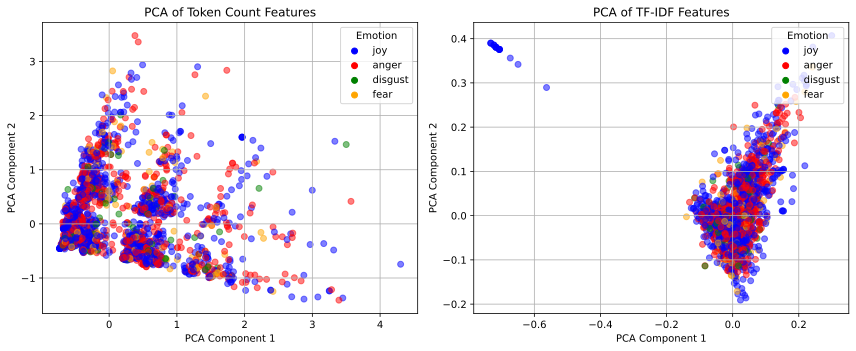

In [50]:
import matplotlib.pyplot as plt
    
# Create a mapping from class labels to colors
class_colors = {
    'joy': 'blue',
    'anger': 'red',
    'disgust': 'green',
    'fear': 'orange'
}
    
# Add a column for class labels based on the filtered DataFrame using .loc
df_filtered.loc[:, 'class'] = df_filtered[['joy', 'anger', 'disgust', 'fear']].idxmax(axis=1)
    
# Prepare the labels and colors for the scatter plots
labels = df_filtered['class'].map(class_colors)
    
# Plotting the reduced token count matrix
plt.figure(figsize=(12, 5))
    
plt.subplot(1, 2, 1)
plt.scatter(X_count_reduced[:, 0], X_count_reduced[:, 1], c=labels, alpha=0.5)
plt.title('PCA of Token Count Features')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid()
    
# Create custom legend for the first plot
for emotion, color in class_colors.items():
    plt.scatter([], [], c=color, label=emotion)  # Create empty scatter points for the legend
plt.legend(title='Emotion', loc='upper right')
    
# Plotting the reduced TF-IDF matrix
plt.subplot(1, 2, 2)
plt.scatter(X_tfidf_reduced[:, 0], X_tfidf_reduced[:, 1], c=labels, alpha=0.5)
plt.title('PCA of TF-IDF Features')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid()
    
# Create custom legend for the second plot
for emotion, color in class_colors.items():
    plt.scatter([], [], c=color, label=emotion)  # Create empty scatter points for the legend
plt.legend(title='Emotion', loc='upper right')
    
plt.tight_layout()
plt.show()

as by seeing from both the plots we can conclude that there will be no vissually seperable classes.